# Linear Regression
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrychowanda/COMP6577/blob/master/COMP6577-2.ipynb)

Import required packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


Load & profile the data

In [ ]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/insurance.csv

--2021-12-13 06:15:32--  https://raw.githubusercontent.com/andrychowanda/COMP6577/master/insurance.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37974 (37K) [text/plain]
Saving to: ‘insurance.csv’

insurance.csv       100%[===================>]  37.08K  --.-KB/s    in 0.003s  

2021-12-13 06:15:32 (10.8 MB/s) - ‘insurance.csv’ saved [37974/37974]



In [ ]:
Data = pd.read_csv("insurance.csv")
print(Data.dtypes)
print(Data.isna().values.any())

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object
False


In [ ]:
print(Data.info())
print(Data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB
None
               age          sex  ...       region       charges
count  1338.000000  1338.000000  ...  1338.000000   1338.000000
mean     39.207025     1.505232  ...     1.513453  13270.422265
std      14.049960     0.500160  ...     1.104915  12110.011237
min      18.000000     1.000000  ...     0.000000   1121.873900
25%      27.000000     1.000000  ...     1.000000   4740.287150
50%      39.000000     2.000000  ...     2.000000   9382.033000
75%      51.000000     2.000000  ...   

Select particular column, and visualise the data (histogram)

   age  sex     bmi  children  smoker  region      charges
0   19    1  27.900         0       1       0  16884.92400
1   18    2  33.770         1       0       2   1725.55230
2   28    2  33.000         3       0       2   4449.46200
3   33    2  22.705         0       0       1  21984.47061
4   32    2  28.880         0       0       1   3866.85520


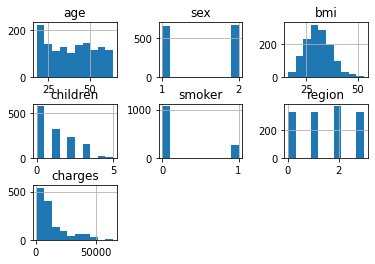

In [ ]:
newData = Data[["age", "sex", "bmi", "children", "smoker", "region", "charges"]]
print(newData.head())
newData.hist()
plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Visualise the data (Scatter)

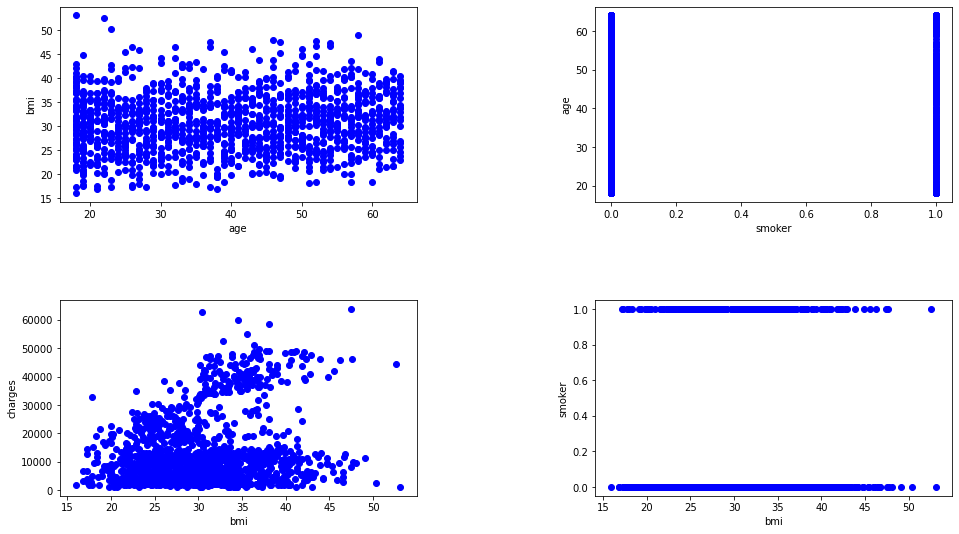

In [ ]:
plt.subplot(221)
plt.scatter(newData["age"], newData["bmi"], color="blue")
plt.xlabel("age")
plt.ylabel("bmi")

plt.subplot(222)
plt.scatter(newData["smoker"], newData["age"], color="blue")
plt.xlabel("smoker")
plt.ylabel("age")

plt.subplot(223)
plt.scatter(newData["bmi"], newData["charges"], color="blue")
plt.xlabel("bmi")
plt.ylabel("charges")

plt.subplot(224)
plt.scatter(newData["bmi"], newData["smoker"], color="blue")
plt.xlabel("bmi")
plt.ylabel("smoker")

plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

Regression - Engine Size

In [ ]:
train, test = train_test_split(newData, test_size=0.2)
regression = linear_model.LinearRegression()
regression.fit(train[["age"]], train[["bmi"]])
print('Coefficients: ', regression.coef_)
print('Intercept: ',regression.intercept_)

Coefficients:  [[0.04616888]]
Intercept:  [28.86494474]


Visualise the regression to the plot

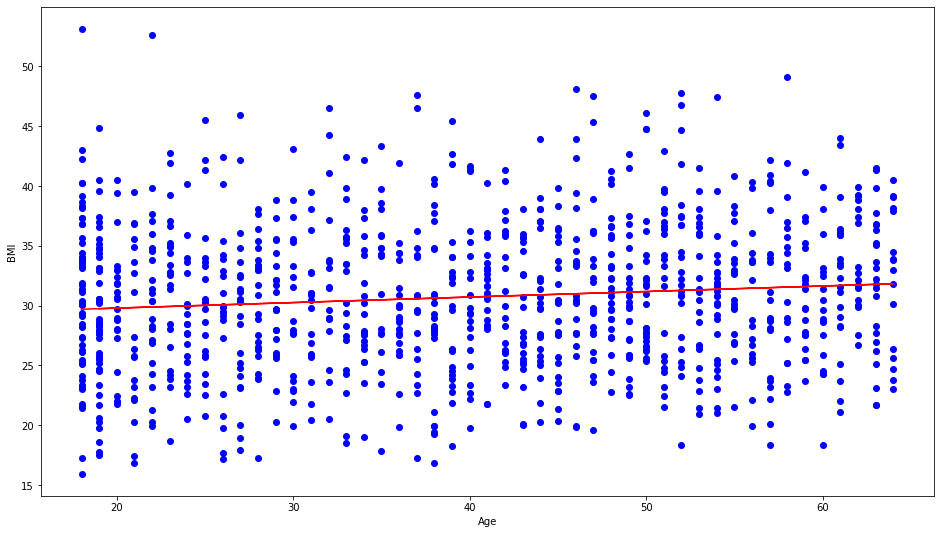

In [ ]:
plt.scatter(train["age"], train["bmi"],  color='blue')
plt.plot(train[["age"]], regression.coef_ * train[["age"]] + regression.intercept_, '-r')
plt.xlabel("Age")
plt.ylabel("BMI")
plt.rcParams["figure.figsize"] = [9,7]
plt.show()

Make the visualisation easier with Seaborn Package

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


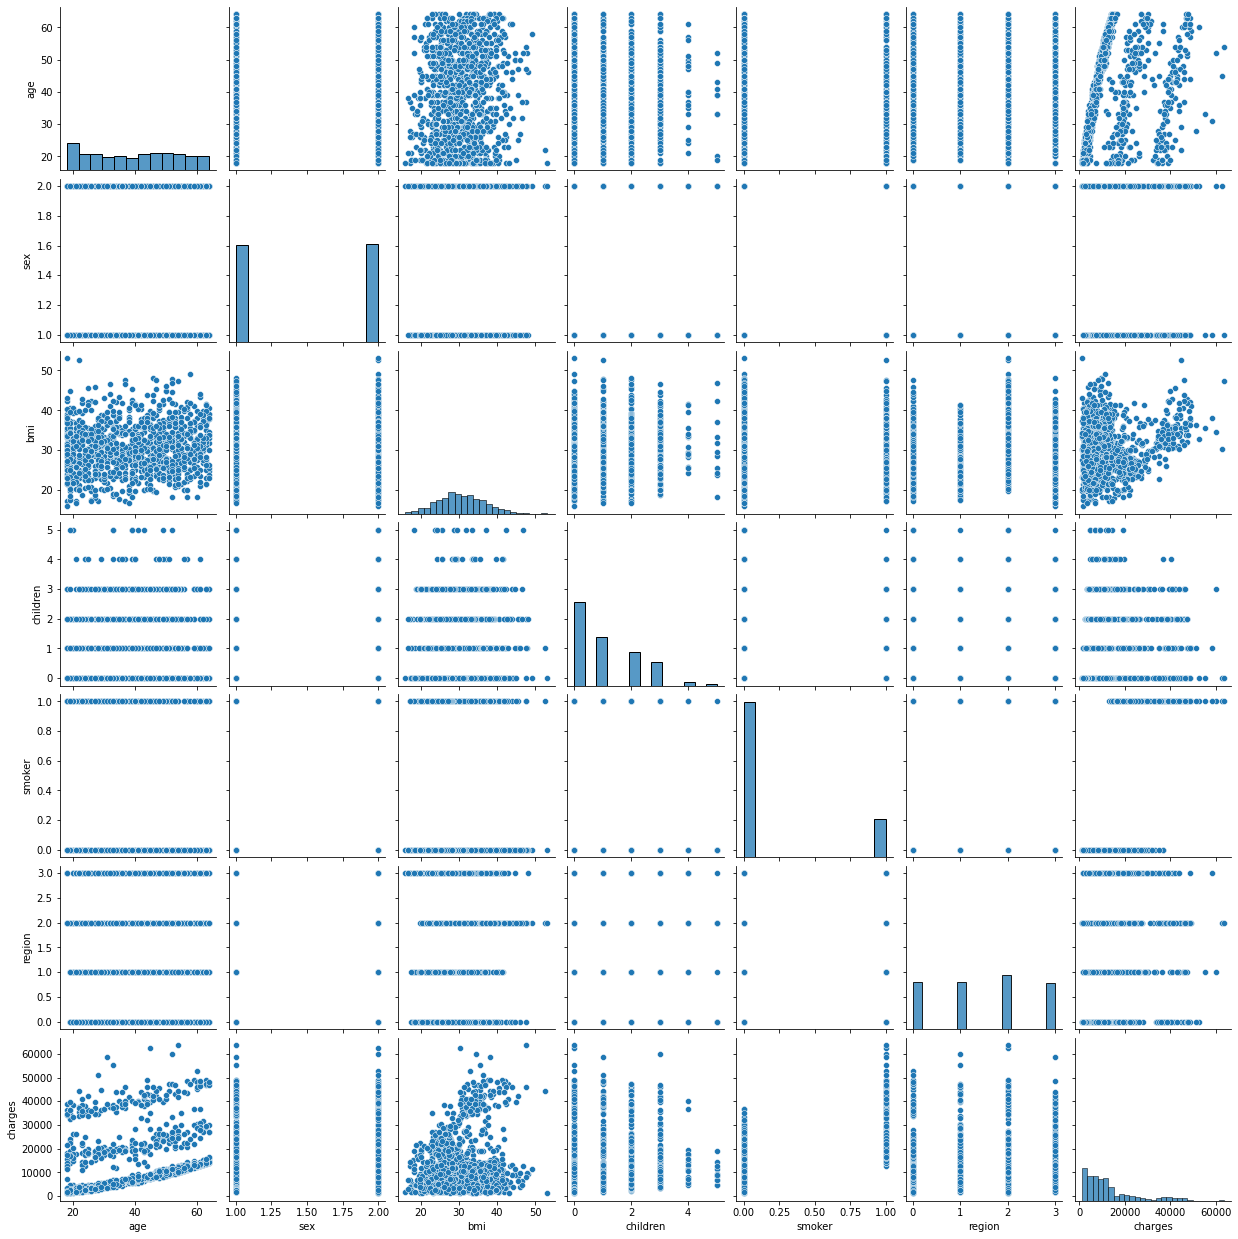

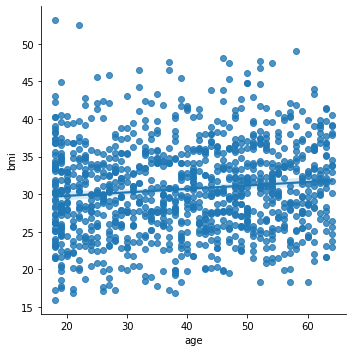

In [ ]:
sb.pairplot(train)
sb.lmplot("age", "bmi", data = train)
plt.show()

Predict new data & evaluate the model

In [ ]:
prediction = regression.predict(test[["age"]])
for i in range(len(test)):
  print(test[["age"]].values[i], prediction[i])

print("MAE : ", mean_absolute_error(test[["bmi"]], prediction))
print("MSE : ", mean_squared_error(test[["bmi"]], prediction))
print("R2 : ", r2_score(test[["bmi"]], prediction))


[18] [29.69598449]
[32] [30.34234874]
[22] [29.88065999]
[19] [29.74215337]
[19] [29.74215337]
[31] [30.29617987]
[60] [31.63507724]
[30] [30.25001099]
[34] [30.43468649]
[42] [30.80403749]
[41] [30.75786862]
[28] [30.15767324]
[37] [30.57319312]
[64] [31.81975274]
[25] [30.01916662]
[61] [31.68124612]
[23] [29.92682887]
[19] [29.74215337]
[34] [30.43468649]
[51] [31.21955737]
[51] [31.21955737]
[56] [31.45040174]
[26] [30.06533549]
[47] [31.03488187]
[39] [30.66553087]
[52] [31.26572624]
[64] [31.81975274]
[30] [30.25001099]
[62] [31.72741499]
[32] [30.34234874]
[56] [31.45040174]
[19] [29.74215337]
[18] [29.69598449]
[51] [31.21955737]
[19] [29.74215337]
[18] [29.69598449]
[40] [30.71169974]
[59] [31.58890837]
[35] [30.48085537]
[19] [29.74215337]
[32] [30.34234874]
[41] [30.75786862]
[31] [30.29617987]
[56] [31.45040174]
[54] [31.35806399]
[32] [30.34234874]
[33] [30.38851762]
[34] [30.43468649]
[35] [30.48085537]
[37] [30.57319312]
[25] [30.01916662]
[20] [29.78832224]
[59] [31.588